In [1]:
import os
os.environ['CRDS_PATH'] = './crds_cache'
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'

In [2]:
from astropy.io import fits
from astropy.time import Time
import bottleneck as bn
import juliet
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from jwst import datamodels
from jwst.pipeline import calwebb_detector1
from jwst.pipeline import calwebb_spec2
from jwst.extract_1d.soss_extract import soss_boxextract
from jwst.extract_1d.soss_extract.soss_solver import solve_transform, transform_coords

from sys import path
spoon_path = '/home/radica/GitHub/supreme-spoon/'
path.insert(1, spoon_path)
from supreme_spoon import custom_stage1, custom_stage2, custom_stage3, custom_stage4
from supreme_spoon import utils, plotting


ERROR:   Could not load MultiNest library: libgfortran.so.3
ERROR:   You have to build MultiNest,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: http://johannesbuchner.github.com/PyMultiNest/install.html

problem: libgfortran.so.3: cannot open shared object file: No such file or directory


In [4]:
# Generate output directories
utils.verify_path('pipeline_outputs_directory')
utils.verify_path('pipeline_outputs_directory/Stage1')
utils.verify_path('pipeline_outputs_directory/Stage2')
utils.verify_path('pipeline_outputs_directory/Stage3')
utils.verify_path('pipeline_outputs_directory/Stage4')

#### Stage 1 -- Detector level processing

Documentation: https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_detector1.html

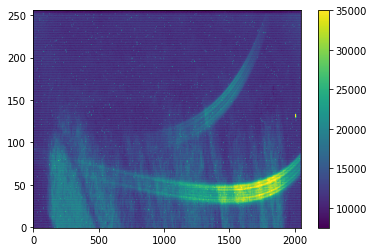

In [5]:
uncal_indir = 'DMS_uncal/'
outdir_s1 = 'pipeline_outputs_directory/Stage1/'
filenames = [uncal_indir+'jw01366001001_04101_00001-seg001_nis_uncal.fits', 
             uncal_indir+'jw01366001001_04101_00001-seg002_nis_uncal.fits',
             uncal_indir+'jw01366001001_04101_00001-seg003_nis_uncal.fits',
             uncal_indir+'jw01366001001_04101_00001-seg004_nis_uncal.fits']

clear_s001 = fits.open(filenames[0])
plt.imshow(clear_s001[1].data[50, 8], origin='lower', aspect='auto', vmax=3.5e4, vmin=7.5e3)
plt.colorbar()
plt.show()

clear_s001.close()

In [21]:
# Group Scale Step
new_results = []
for file in filenames:
    step = calwebb_detector1.group_scale_step.GroupScaleStep()
    res = step.call(file, output_dir=outdir_s1, save_results=True)
    new_results.append(res)
results = new_results

2022-07-29 09:57:12,199 - stpipe.GroupScaleStep - INFO - GroupScaleStep instance created.
2022-07-29 09:57:20,652 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_nirspec_mask_0024.rmap     2.0 K bytes  (1 / 5 files) (0 / 16.8 K bytes)
2022-07-29 09:57:20,957 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_nirspec_0267.imap          5.1 K bytes  (2 / 5 files) (2.0 K / 16.8 K bytes)
2022-07-29 09:57:21,367 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_miri_photom_0037.rmap      3.9 K bytes  (3 / 5 files) (7.1 K / 16.8 K bytes)
2022-07-29 09:57:22,619 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_miri_0302.imap             5.2 K bytes  (4 / 5 files) (11.0 K / 16.8 K bytes)
2022-07-29 09:57:23,147 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_0939.pmap                    580 bytes  (5 / 5 files) (16.2 K / 16.8 K bytes)
2022-07-29 09:57:24,616 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage1/', 'save

In [22]:
# DQ Initializaion Step
new_results = []
for file in results:
    step = calwebb_detector1.dq_init_step.DQInitStep()
    res =step.call(file, output_dir=outdir_s1, save_results=True)
    new_results.append(res)
results = new_results

2022-07-29 10:04:34,474 - stpipe.DQInitStep - INFO - DQInitStep instance created.
2022-07-29 10:04:34,489 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage1/', 'save_results': True, 'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_mask': None}


2022-07-29 10:04:34,490 - stpipe.DQInitStep - INFO - DQInitStep instance created.
2022-07-29 10:04:34,740 - stpipe.DQInitStep - INFO - Step DQInitStep running with args (<RampModel(158, 9, 256, 2048) from jw01366001001_04101_00001-seg001_nis_groupscalestep.fits>,).
2022-07-29 10:04:34,742 - stpipe.DQInitStep - INFO - Step DQInitStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'pipeline_outputs_directory/Stage1/', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': Tr

In [23]:
# Saturation Detection Step
new_results = []
for file in results:
    step = calwebb_detector1.saturation_step.SaturationStep()
    res = step.call(file, output_dir=outdir_s1, save_results=True)
    new_results.append(res)
results = new_results

2022-07-29 10:10:25,683 - stpipe.SaturationStep - INFO - SaturationStep instance created.
2022-07-29 10:10:25,697 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage1/', 'save_results': True, 'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'n_pix_grow_sat': 1, 'override_saturation': None}


2022-07-29 10:10:25,698 - stpipe.SaturationStep - INFO - SaturationStep instance created.
2022-07-29 10:10:25,885 - stpipe.SaturationStep - INFO - Step SaturationStep running with args (<RampModel(158, 9, 256, 2048) from jw01366001001_04101_00001-seg001_nis_dqinitstep.fits>,).
2022-07-29 10:10:25,887 - stpipe.SaturationStep - INFO - Step SaturationStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'pipeline_outputs_directory/Stage1/', 'output_ext': '.fits', 'output_use_mode

2022-07-29 10:14:22,029 - stpipe.SaturationStep - INFO - Step SaturationStep done


In [ ]:
# Superbias Subtraction Step
new_results = []
for file in results:
    step = calwebb_detector1.superbias_step.SuperBiasStep()
    res = step.call(file, output_dir=outdir_s1, save_results=True)
    new_results.append(res)
results = new_results

In [ ]:
# Reference Pixel Correction Step
new_results = []
for file in results:
    step = calwebb_detector1.refpix_step.RefPixStep()
    res = step.call(file, output_dir=outdir_s1, save_results=True)
    new_results.append(res)
results = new_results

In [ ]:
plt.imshow(results[0].data[50, 10], aspect='auto', origin='lower', vmin=0, vmax=500)
plt.colorbar()

In [ ]:
# Background Subtraction Step
background_model = np.load('model_background.npy')
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    results = custom_stage1.backgroundstep(results, background_model, output_dir=outdir_s1, 
                                           save_results=True, show_plots=True)

In [ ]:
sat = fits.getdata(outdir_s1+'jw01366001001_04101_00001-seg001_nis_saturationstep.fits', 1)
backg = fits.getdata(outdir_s1+'jw01366001001_04101_00001-seg001_nis_background.fits', 0)
backsub = fits.getdata(outdir_s1+'jw01366001001_04101_00001-seg001_nis_backgroundstep.fits', 1)

fig = plt.figure(figsize=(6, 10), facecolor='white')
gs = GridSpec(3, 1, height_ratios=[1, 1, 1])

ax1 = fig.add_subplot(gs[0])
plt.imshow(sat[50, 10], origin='lower', aspect='auto', vmin=0, vmax=10)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax2 = fig.add_subplot(gs[1])
pp = plt.imshow(backg[10], origin='lower', aspect='auto', vmin=0, vmax=10)
cax = ax2.inset_axes([1.05, -0.1, 0.03, 1.2], transform=ax2.transAxes)
fig.colorbar(pp, ax=ax2, cax=cax)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

ax3 = fig.add_subplot(gs[2])
plt.imshow(backsub[50, 10], origin='lower', aspect='auto', vmin=0, vmax=10)

gs.update(hspace=0.05)
plt.show()

In [63]:
# 1/f Correction Step
results = custom_stage1.oneoverfstep(results, out_frames=[150, -100],
                                     scaling_curve=None, output_dir=outdir_s1,
                                     save_results=True, outlier_maps=None,
                                     trace_mask=None)

Starting custom 1/f correction step.
Generating a deep stack for each frame using all integrations...
Starting segment 1 of 4.
 Considering data quality flags.
 No outlier maps passed, ignoring outliers.
 No trace mask passed, ignoring the trace.


100%|█████████████████████████████████████████| 158/158 [01:15<00:00,  2.08it/s]


Starting segment 2 of 4.
 Considering data quality flags.
 No outlier maps passed, ignoring outliers.
 No trace mask passed, ignoring the trace.


100%|█████████████████████████████████████████| 158/158 [01:15<00:00,  2.09it/s]


Starting segment 3 of 4.
 Considering data quality flags.
 No outlier maps passed, ignoring outliers.
 No trace mask passed, ignoring the trace.


100%|█████████████████████████████████████████| 158/158 [01:14<00:00,  2.11it/s]


Starting segment 4 of 4.
 Considering data quality flags.
 No outlier maps passed, ignoring outliers.
 No trace mask passed, ignoring the trace.


100%|███████████████████████████████████████████| 63/63 [00:29<00:00,  2.11it/s]


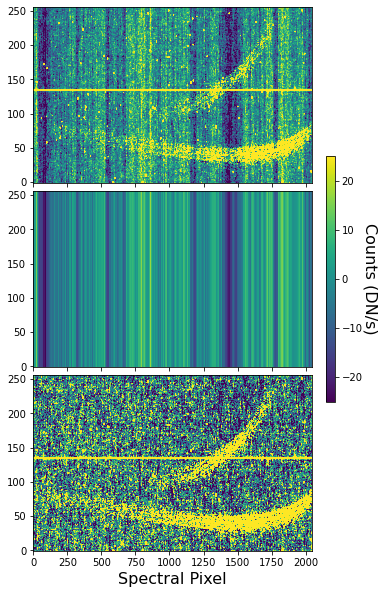

In [70]:
n, i = 120, 3
fig = plt.figure(figsize=(5, 10), facecolor='white')
gs = GridSpec(3, 1, height_ratios=[1, 1, 1])

ax1 = fig.add_subplot(gs[0])
sub = fits.getdata(outdir_s1+'jw01366001001_04101_00001-seg001_nis_oneoverfstep_diffim.fits', 0)
plt.imshow(sub[n, i] - np.nanmedian(sub[n, i]), origin='lower', aspect='auto', 
           vmax=25, vmin=-25)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax2 = fig.add_subplot(gs[1])
noise = fits.getdata(outdir_s1+'jw01366001001_04101_00001-seg001_nis_oneoverfstep_noisemap.fits', 0)
pp = plt.imshow(noise[n, i] - np.nanmedian(noise[n, i]), origin='lower', aspect='auto', 
                vmax=25, vmin=-25)
cax = ax2.inset_axes([1.05, -0.2, 0.03, 1.4], transform=ax2.transAxes)
cb = fig.colorbar(pp, ax=ax2, cax=cax)
cb.set_label('Counts (DN/s)', labelpad=15, rotation=270, fontsize=16)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

ax3 = fig.add_subplot(gs[2])
subcorr = fits.getdata(outdir_s1+'jw01366001001_04101_00001-seg001_nis_oneoverfstep_diffimcorr.fits', 0)
plt.imshow(subcorr[n, i], origin='lower', aspect='auto', vmax=10, vmin=-10)
plt.xlabel('Spectral Pixel', fontsize=16)

gs.update(hspace=0.05)
plt.show()

In [77]:
# Linearity Correction Step
new_results = []
for file in results:
    step = calwebb_detector1.linearity_step.LinearityStep()
    res = step.call(file, output_dir=outdir_s1, save_results=True)
    # Hack to remove oneoverfstep tag from file name.
    res = utils.fix_filenames(res, '_oneoverfstep_', outdir_s1)[0]
    new_results.append(res)
results = new_results

2022-07-29 15:44:06,874 - stpipe.SuperBiasStep - INFO - SuperBiasStep instance created.
2022-07-29 15:44:07,594 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_nircam_superbias_0011.rmap   11.2 K bytes  (1 / 5 files) (0 / 40.3 K bytes)
2022-07-29 15:44:07,777 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_nircam_readnoise_0017.rmap   18.5 K bytes  (2 / 5 files) (11.2 K / 40.3 K bytes)
2022-07-29 15:44:08,005 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_nircam_photom_0013.rmap    5.0 K bytes  (3 / 5 files) (29.7 K / 40.3 K bytes)
2022-07-29 15:44:08,148 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_nircam_0221.imap           5.0 K bytes  (4 / 5 files) (34.7 K / 40.3 K bytes)
2022-07-29 15:44:08,260 - CRDS - INFO -  Fetching  ./crds_cache/mappings/jwst/jwst_0942.pmap                    580 bytes  (5 / 5 files) (39.7 K / 40.3 K bytes)
2022-07-29 15:44:08,841 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage1/',

2022-07-29 15:48:49,465 - stpipe.SuperBiasStep - INFO - SuperBiasStep instance created.


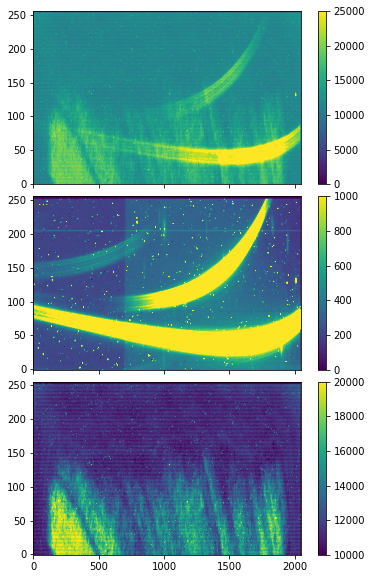

In [78]:
# Jump Detection Step
new_results = []
for file in results:
    step = calwebb_detector1.jump_step.JumpStep()
    res = step.call(file, maximum_cores='quarter', rejection_threshold=5,
                    output_dir=outdir_s1, save_results=True)
    new_results.append(res)
results = new_results

In [79]:
new_results, stacks = [], []
for file in results:
    step = calwebb_detector1.ramp_fit_step.RampFitStep()
    stack, res = step.call(file, output_dir=outdir_s1, save_results=True)
    res = utils.fix_filenames(res, '_1_', outdir_s1)[0]
    new_results.append(res)
    stacks.append(stack)
results = new_results

# Store pixel flags in seperate file to be used later.
for file in results:
    data = datamodels.open(file)
    fileroot = data.meta.filename.split('rampfitstep')[0]
    hdu = fits.PrimaryHDU(data.dq)
    hdu.writeto(outdir_s1+fileroot+'dqpixelflags.fits', overwrite=True)

2022-07-29 15:49:38,480 - stpipe.LinearityStep - INFO - LinearityStep instance created.
2022-07-29 15:49:38,496 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage1/', 'save_results': True, 'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'override_linearity': None}


2022-07-29 15:49:38,497 - stpipe.LinearityStep - INFO - LinearityStep instance created.
2022-07-29 15:49:39,068 - stpipe.LinearityStep - INFO - Step LinearityStep running with args (<RampModel(158, 9, 256, 2048) from jw01366001001_04101_00001-seg001_nis_superbiasstep.fits>,).
2022-07-29 15:49:39,070 - stpipe.LinearityStep - INFO - Step LinearityStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'pipeline_outputs_directory/Stage1/', 'output_ext': '.fits', 'output_use_model': False, 'output_use_inde

In [ ]:
# Gain Scale Step
new_results = []
for file in results:
    step = calwebb_detector1.gain_scale_step.GainScaleStep()
    res = step.call(file, output_dir=outdir_s1, save_results=True)
    new_results.append(res)
results = new_results

#### Stage 2 -- Spectroscopic processing

Documentation: https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_spec2.html

In [105]:
outdir_s2 = 'pipeline_outputs_directory/Stage2/'

In [106]:
# Assign WCS Step
new_results = []
for file in results:
    step = calwebb_spec2.assign_wcs_step.AssignWcsStep()
    res = step.call(file, output_dir=outdir_s2, save_results=True)
    new_results.append(res)
results = new_results

2022-07-29 17:40:26,880 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2022-07-29 17:40:26,897 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage2/', 'save_results': True, 'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55, 'override_distortion': None, 'override_filteroffset': None, 'override_specwcs': None, 'override_regions': None, 'override_wavelengthrange': None, 'override_camera': None, 'override_collimator': None, 'override_disperser': None, 'override_fore': None, 'override_fpa': None, 'override_msa': None, 'override_ote': None, 'override_ifupost': None, 'override_ifufore': None, 'override_ifuslicer':

2022-07-29 17:40:55,564 - stpipe.AssignWcsStep - INFO - Step AssignWcsStep done
2022-07-29 17:40:55,567 - stpipe.AssignWcsStep - INFO - AssignWcsStep instance created.
2022-07-29 17:40:55,582 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage2/', 'save_results': True, 'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'sip_approx': True, 'sip_max_pix_error': 0.25, 'sip_degree': None, 'sip_max_inv_pix_error': 0.25, 'sip_inv_degree': None, 'sip_npoints': 32, 'slit_y_low': -0.55, 'slit_y_high': 0.55, 'override_distortion': None, 'override_filteroffset': None, 'override_specwcs': None, 'override_regions': None, 'override_wavelengthrange': None, 'override_camera': None, 'override_collimator': None, 'override_disperser': None, 'override_fore': None, 'override_fpa': None, 'override_msa': None, 'override_ote':

In [107]:
# Source Type Step
new_results = []
for file in results:
    step = calwebb_spec2.srctype_step.SourceTypeStep()
    res = step.call(file, output_dir=outdir_s2, save_results=True)
    new_results.append(res)
results = new_results

2022-07-29 17:41:00,649 - stpipe.SourceTypeStep - INFO - SourceTypeStep instance created.
2022-07-29 17:41:00,663 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage2/', 'save_results': True, 'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'source_type': None}


2022-07-29 17:41:00,665 - stpipe.SourceTypeStep - INFO - SourceTypeStep instance created.
2022-07-29 17:41:01,022 - stpipe.SourceTypeStep - INFO - Step SourceTypeStep running with args (<CubeModel(158, 256, 2048) from jw01366001001_04101_00001-seg001_nis_assignwcsstep.fits>,).
2022-07-29 17:41:01,024 - stpipe.SourceTypeStep - INFO - Step SourceTypeStep parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': 'pipeline_outputs_directory/Stage2/', 'output_ext': '.fits', 'output_use_model': False, 'output_use_index'

In [109]:
# Flat Field Step
new_results = []
for file in results:
    step = calwebb_spec2.flat_field_step.FlatFieldStep()
    res = step.call(file, output_dir=outdir_s2, save_results=True)
    new_results.append(res)
results = new_results

2022-07-29 17:42:24,403 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2022-07-29 17:42:24,416 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage2/', 'save_results': True, 'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'save_interpolated_flat': False, 'user_supplied_flat': None, 'inverse': False, 'override_flat': None, 'override_fflat': None, 'override_sflat': None, 'override_dflat': None}


2022-07-29 17:42:24,416 - stpipe.FlatFieldStep - INFO - FlatFieldStep instance created.
2022-07-29 17:42:24,770 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep running with args (<CubeModel(158, 256, 2048) from jw01366001001_04101_00001-seg001_nis_sourcetypestep.fits>,).
2022-07-29 17:42:24,772 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep parameters are: {'pre_hooks': [], 'post_hooks':

2022-07-29 17:43:12,769 - stpipe.FlatFieldStep - WARNING - Unable to locate schema file for 'tag:stsci.edu:jwst_pipeline/niriss-soss-0.7.0': 'http://stsci.edu/schemas/jwst_pipeline/niriss-soss-0.7.0'

2022-07-29 17:43:21,022 - stpipe.FlatFieldStep - INFO - Saved model in pipeline_outputs_directory/Stage2/jw01366001001_04101_00001-seg004_nis_flatfieldstep.fits
2022-07-29 17:43:21,025 - stpipe.FlatFieldStep - INFO - Step FlatFieldStep done


In [120]:
# Bad Pixel Correction Step
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    res = custom_stage2.badpixstep(results, out_frames=[150, -100], output_dir=outdir_s2,
                                   save_results=True)
    results, deepframe = res[0], res[2]

Starting custom outlier interpolation step.
Starting iteration 1 of 2.
 Generating a deep stack using all integrations...


100%|███████████████████████████████████████| 2048/2048 [01:27<00:00, 23.52it/s]


 1725 bad pixels identified this iteration.


100%|█████████████████████████████████████████| 537/537 [12:27<00:00,  1.39s/it]


Starting iteration 2 of 2.
 Generating a deep stack using all integrations...


100%|███████████████████████████████████████| 2048/2048 [01:27<00:00, 23.49it/s]


 525 bad pixels identified this iteration.


100%|█████████████████████████████████████████| 537/537 [11:26<00:00,  1.28s/it]
2022-07-29 18:17:23,973 - stpipe - WARNING - Unable to locate schema file for 'tag:stsci.edu:jwst_pipeline/niriss-soss-0.7.0': 'http://stsci.edu/schemas/jwst_pipeline/niriss-soss-0.7.0'

2022-07-29 18:17:31,068 - stpipe - WARNING - Unable to locate schema file for 'tag:stsci.edu:jwst_pipeline/niriss-soss-0.7.0': 'http://stsci.edu/schemas/jwst_pipeline/niriss-soss-0.7.0'

2022-07-29 18:17:38,649 - stpipe - WARNING - Unable to locate schema file for 'tag:stsci.edu:jwst_pipeline/niriss-soss-0.7.0': 'http://stsci.edu/schemas/jwst_pipeline/niriss-soss-0.7.0'

2022-07-29 18:17:45,671 - stpipe - WARNING - Unable to locate schema file for 'tag:stsci.edu:jwst_pipeline/niriss-soss-0.7.0': 'http://stsci.edu/schemas/jwst_pipeline/niriss-soss-0.7.0'



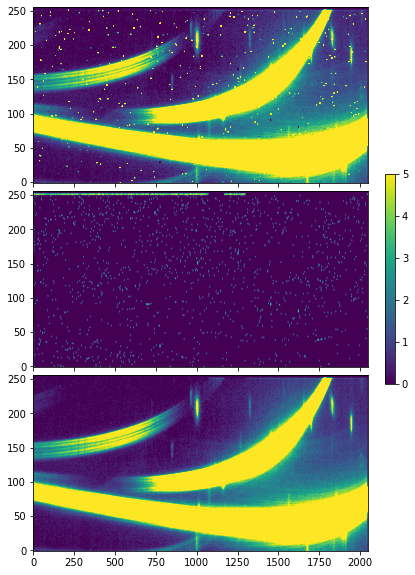

In [122]:
flat = fits.getdata(outdir_s2+'jw01366001001_04101_00001-seg001_nis_flatfieldstep.fits', 1)
badpix = fits.getdata(outdir_s2+'jw01366001001_04101_00001_nis_badpixmap.fits', 0)
interp = fits.getdata(outdir_s2+'jw01366001001_04101_00001-seg001_nis_badpixstep.fits', 1)

fig = plt.figure(figsize=(6, 10), facecolor='white')
gs = GridSpec(3, 1, height_ratios=[1, 1, 1])

ax1 = fig.add_subplot(gs[0])
pp = plt.imshow(flat[50], origin='lower', aspect='auto', vmin=0, vmax=5)
ax1.xaxis.set_major_formatter(plt.NullFormatter())

ax2 = fig.add_subplot(gs[1])
plt.imshow(badpix, origin='lower', aspect='auto', vmin=0, vmax=1)
cax = ax2.inset_axes([1.05, -0.1, 0.03, 1.2], transform=ax2.transAxes)
fig.colorbar(pp, ax=ax2, cax=cax)
ax2.xaxis.set_major_formatter(plt.NullFormatter())

ax3 = fig.add_subplot(gs[2])
plt.imshow(interp[50], origin='lower', aspect='auto', vmin=0, vmax=5)

gs.update(hspace=0.05)
plt.show()

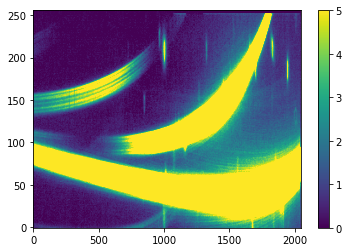

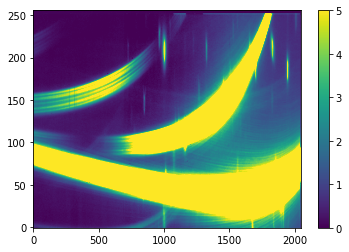

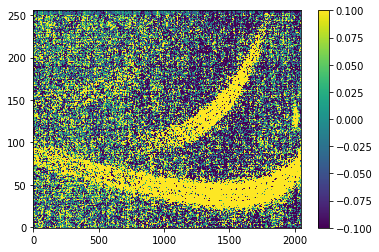

In [6]:
deep = fits.getdata('pipeline_outputs_directory/Stage2/jw01366001001_04101_00001_nis_deepframe.fits')
data = fits.getdata('pipeline_outputs_directory/Stage2/jw01366001001_04101_00001-seg001_nis_badpixstep.fits', 1)

plt.imshow(data[50], aspect='auto', origin='lower', vmax=5, vmin=0)
plt.colorbar()
plt.show()

plt.imshow(deep, aspect='auto', origin='lower', vmax=5, vmin=0)
plt.colorbar()
plt.show()

plt.imshow(data[50] - deep, aspect='auto', origin='lower', vmax=0.1, vmin=-0.1)
plt.colorbar()
plt.show()

In [ ]:
# Trace Mask Creation Step
mask = custom_stage2.tracemaskstep(deepframe, results[0], output_dir=outdir_s2, mask_width=30,
                                   save_results=True, show_plots=False)

In [ ]:
# LC Scalng Estimation Step
scaling = custom_stage2.lcestimatestep(results, out_frames=[150, -100],
                                       save_results=True, output_dir=outdir_s2)

plt.plot(scaling)

#### Stage 3 -- 1D Spectral Extraction

In [6]:
outdir_s3 = 'pipeline_outputs_directory/Stage3/'

2022-07-29 18:37:26,236 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.


Solving the SOSS transform


2022-07-29 18:37:31,778 - stpipe - INFO - Measuring trace position for order 1 only.


Determined a transform of:
x = 0
y = 0
theta = 0


2022-07-29 18:37:33,992 - stpipe - WARNING - /home/radica/.anaconda3/envs/atoca/lib/python3.10/site-packages/numpy/core/shape_base.py:121: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)



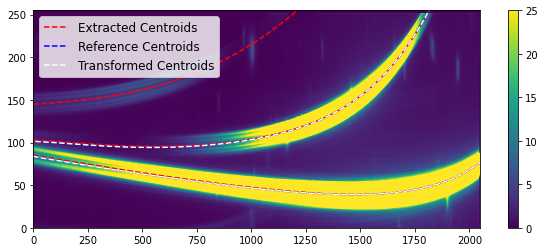

In [4]:
deep = fits.getdata('pipeline_outputs_directory/Stage2/jw01366001001_04101_00001_nis_deepframe.fits')
data = 'pipeline_outputs_directory/Stage2/jw01366001001_04101_00001-seg001_nis_badpixstep.fits'
transform = custom_stage3.get_soss_transform(deep, data, show_plots=True, save_results=False)

In [10]:
new_results = []
for file in results:
    step = calwebb_spec2.extract_1d_step.Extract1dStep()
    res = step.call(file, output_dir=outdir_s3, save_results=True,
                    soss_transform=[0, 0, 0],
                    soss_atoca=False, subtract_background=False, soss_bad_pix='masking',
                    soss_width=25, soss_modelname=None)
    new_results.append(res)
results = new_results

2022-07-29 18:42:03,386 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.
2022-07-29 18:42:03,469 - stpipe - WARNING - /home/radica/.anaconda3/envs/atoca/lib/python3.10/site-packages/asdf/schema.py:303: AsdfWarning: Unable to locate schema file for 'tag:stsci.edu:jwst_pipeline/niriss-soss-0.7.0': 'http://stsci.edu/schemas/jwst_pipeline/niriss-soss-0.7.0'
  warnings.warn(msg.format(tag, schema_uri), AsdfWarning)

2022-07-29 18:42:04,577 - stpipe - CRITICAL - config: {'output_dir': 'pipeline_outputs_directory/Stage3/', 'save_results': True, 'soss_transform': [0, 0, 0], 'soss_atoca': False, 'subtract_background': False, 'soss_bad_pix': 'masking', 'soss_width': 25, 'soss_modelname': None, 'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': None, 'smoothing_length': None, 'bkg_fit': None, 'bkg_order': None, 'bkg_sigma_clip': 3.

2022-07-29 18:42:08,140 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:08,141 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:08,166 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:08,191 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:08,288 - stpipe.Extract1dStep - INFO - Processing integration 8 of 158.
2022-07-29 18:42:08,293 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:08,293 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:08,336 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:08,336 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:08,362 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:08,386 - stpipe.Extract1dStep

2022-07-29 18:42:10,405 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:10,446 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:10,446 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:10,471 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:10,496 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:10,589 - stpipe.Extract1dStep - INFO - Processing integration 20 of 158.
2022-07-29 18:42:10,594 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:10,595 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:10,639 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:10,639 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
202

2022-07-29 18:42:12,625 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:12,672 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:12,673 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:12,699 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:12,724 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:12,822 - stpipe.Extract1dStep - INFO - Processing integration 31 of 158.
2022-07-29 18:42:12,827 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:12,828 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:12,875 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:12,875 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
202

2022-07-29 18:42:14,879 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:14,984 - stpipe.Extract1dStep - INFO - Processing integration 42 of 158.
2022-07-29 18:42:14,989 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:14,990 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:15,042 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:15,043 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:15,073 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:15,101 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:15,487 - stpipe.Extract1dStep - INFO - Processing integration 43 of 158.
2022-07-29 18:42:15,492 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:15,493 - stpipe.Extract1dStep - IN

2022-07-29 18:42:17,689 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:17,690 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:17,735 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:17,735 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:17,764 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:17,790 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:17,894 - stpipe.Extract1dStep - INFO - Processing integration 54 of 158.
2022-07-29 18:42:17,899 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:17,900 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:17,949 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 1

2022-07-29 18:42:20,195 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:20,223 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:20,328 - stpipe.Extract1dStep - INFO - Processing integration 65 of 158.
2022-07-29 18:42:20,333 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:20,334 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:20,382 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:20,383 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:20,411 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:20,440 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:20,541 - stpipe.Extract1dStep - INFO - Processing integration 66 of 158.
2022-07-29 18:42:20,547 - stpipe.Extract1d

2022-07-29 18:42:22,782 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:22,810 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:22,838 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:22,943 - stpipe.Extract1dStep - INFO - Processing integration 77 of 158.
2022-07-29 18:42:22,947 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:22,948 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:22,998 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:22,998 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:23,029 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:23,055 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:23,153 - stpipe.Extra

2022-07-29 18:42:25,127 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:25,225 - stpipe.Extract1dStep - INFO - Processing integration 88 of 158.
2022-07-29 18:42:25,231 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:25,231 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:25,279 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:25,280 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:25,308 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:25,334 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:25,437 - stpipe.Extract1dStep - INFO - Processing integration 89 of 158.
2022-07-29 18:42:25,441 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:25,442 - stpipe.Extract1dStep - IN

2022-07-29 18:42:27,865 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:27,866 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:27,893 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:27,919 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:28,021 - stpipe.Extract1dStep - INFO - Processing integration 100 of 158.
2022-07-29 18:42:28,026 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:28,026 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:28,073 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:28,074 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:28,101 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:28,126 - stpipe.Extract1dSt

2022-07-29 18:42:30,343 - stpipe.Extract1dStep - INFO - Processing integration 111 of 158.
2022-07-29 18:42:30,348 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:30,349 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:30,398 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:30,398 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:30,425 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:30,452 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:30,555 - stpipe.Extract1dStep - INFO - Processing integration 112 of 158.
2022-07-29 18:42:30,560 - stpipe.Extract1dStep - WARNING - Input contains invalid values that are not flagged correctly in the dq map. They will be masked for the following procedure.
2022-07-29 18:42:30,561 - stpipe.Extract1dSt

2022-07-29 18:42:32,781 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:32,811 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:32,838 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:32,952 - stpipe.Extract1dStep - INFO - Processing integration 123 of 158.
2022-07-29 18:42:32,958 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:32,958 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:33,019 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:33,019 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:33,050 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:33,082 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:33,193 - stpipe.Extr

2022-07-29 18:42:35,374 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:35,481 - stpipe.Extract1dStep - INFO - Processing integration 134 of 158.
2022-07-29 18:42:35,486 - stpipe.Extract1dStep - WARNING - Input contains invalid values that are not flagged correctly in the dq map. They will be masked for the following procedure.
2022-07-29 18:42:35,487 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:35,487 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:35,544 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:35,544 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:35,572 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:35,600 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:35,706 - stpipe.Extract1

2022-07-29 18:42:38,206 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:38,242 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:38,364 - stpipe.Extract1dStep - INFO - Processing integration 146 of 158.
2022-07-29 18:42:38,369 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:38,370 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:38,435 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:38,436 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:38,470 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:38,501 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:38,622 - stpipe.Extract1dStep - INFO - Processing integration 147 of 158.
2022-07-29 18:42:38,628 - stpipe.Extract

2022-07-29 18:42:41,663 - stpipe.Extract1dStep - INFO - Processing integration 157 of 158.
2022-07-29 18:42:41,670 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:41,671 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:42:41,741 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:42:41,741 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:42:41,781 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:42:41,818 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:42:41,952 - stpipe.Extract1dStep - INFO - Processing integration 158 of 158.
2022-07-29 18:42:41,959 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:42:41,960 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07

2022-07-29 18:43:46,172 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:46,221 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:43:46,222 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:43:46,248 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:43:46,275 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:43:46,372 - stpipe.Extract1dStep - INFO - Processing integration 6 of 158.
2022-07-29 18:43:46,377 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:46,378 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:46,415 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:43:46,416 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022

2022-07-29 18:43:48,487 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:48,488 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:48,527 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:43:48,527 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:43:48,553 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:43:48,578 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:43:48,672 - stpipe.Extract1dStep - INFO - Processing integration 18 of 158.
2022-07-29 18:43:48,677 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:48,678 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:48,720 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 1

2022-07-29 18:43:50,806 - stpipe.Extract1dStep - INFO - Processing integration 29 of 158.
2022-07-29 18:43:50,811 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:50,811 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:50,853 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:43:50,854 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:43:50,880 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:43:50,905 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:43:50,999 - stpipe.Extract1dStep - INFO - Processing integration 30 of 158.
2022-07-29 18:43:51,004 - stpipe.Extract1dStep - WARNING - Input contains invalid values that are not flagged correctly in the dq map. They will be masked for the following procedure.
2022-07-29 18:43:51,004 - stpipe.Extract1dStep

2022-07-29 18:43:53,005 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:43:53,031 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:43:53,056 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:43:53,154 - stpipe.Extract1dStep - INFO - Processing integration 41 of 158.
2022-07-29 18:43:53,159 - stpipe.Extract1dStep - WARNING - Input contains invalid values that are not flagged correctly in the dq map. They will be masked for the following procedure.
2022-07-29 18:43:53,160 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:53,161 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:53,201 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:43:53,202 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:43:53,228 - stpipe.Extract1d

2022-07-29 18:43:55,317 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:43:55,419 - stpipe.Extract1dStep - INFO - Processing integration 52 of 158.
2022-07-29 18:43:55,425 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:55,426 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:55,474 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:43:55,475 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:43:55,502 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:43:55,528 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:43:55,633 - stpipe.Extract1dStep - INFO - Processing integration 53 of 158.
2022-07-29 18:43:55,639 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:55,640 - stpipe.Extract1dStep - IN

2022-07-29 18:43:57,973 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:57,974 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:58,019 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:43:58,019 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:43:58,046 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:43:58,075 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:43:58,173 - stpipe.Extract1dStep - INFO - Processing integration 64 of 158.
2022-07-29 18:43:58,178 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:43:58,178 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:43:58,221 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 1

2022-07-29 18:44:00,505 - stpipe.Extract1dStep - INFO - Processing integration 75 of 158.
2022-07-29 18:44:00,510 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:00,511 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:00,562 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:00,562 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:44:00,589 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:00,623 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:00,728 - stpipe.Extract1dStep - INFO - Processing integration 76 of 158.
2022-07-29 18:44:00,733 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:00,734 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-2

2022-07-29 18:44:03,140 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:03,253 - stpipe.Extract1dStep - INFO - Processing integration 87 of 158.
2022-07-29 18:44:03,258 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:03,259 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:03,313 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:03,314 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:44:03,344 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:03,382 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:03,501 - stpipe.Extract1dStep - INFO - Processing integration 88 of 158.
2022-07-29 18:44:03,507 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:03,508 - stpipe.Extract1dStep - IN

2022-07-29 18:44:05,935 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:05,965 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:06,073 - stpipe.Extract1dStep - INFO - Processing integration 99 of 158.
2022-07-29 18:44:06,078 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:06,079 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:06,131 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:06,132 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:44:06,162 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:06,196 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:06,308 - stpipe.Extract1dStep - INFO - Processing integration 100 of 158.
2022-07-29 18:44:06,314 - stpipe.Extract1

2022-07-29 18:44:08,646 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:08,698 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:08,699 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:44:08,728 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:08,755 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:08,858 - stpipe.Extract1dStep - INFO - Processing integration 111 of 158.
2022-07-29 18:44:08,863 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:08,864 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:08,917 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:08,918 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
20

2022-07-29 18:44:11,072 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:11,120 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:11,120 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:44:11,148 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:11,175 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:11,280 - stpipe.Extract1dStep - INFO - Processing integration 122 of 158.
2022-07-29 18:44:11,285 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:11,286 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:11,335 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:11,336 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
20

2022-07-29 18:44:13,545 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:13,645 - stpipe.Extract1dStep - INFO - Processing integration 133 of 158.
2022-07-29 18:44:13,651 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:13,651 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:13,699 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:13,700 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:44:13,728 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:13,753 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:14,363 - stpipe.Extract1dStep - INFO - Processing integration 134 of 158.
2022-07-29 18:44:14,369 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:14,370 - stpipe.Extract1dStep - 

2022-07-29 18:44:16,605 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:16,632 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:16,736 - stpipe.Extract1dStep - INFO - Processing integration 145 of 158.
2022-07-29 18:44:16,741 - stpipe.Extract1dStep - WARNING - Input contains invalid values that are not flagged correctly in the dq map. They will be masked for the following procedure.
2022-07-29 18:44:16,742 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:16,743 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:16,792 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:16,793 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:44:16,821 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:16,847 - stpipe.Extract1

2022-07-29 18:44:19,150 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:19,202 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:19,203 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:44:19,232 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:44:19,262 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:44:19,370 - stpipe.Extract1dStep - INFO - Processing integration 157 of 158.
2022-07-29 18:44:19,375 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:44:19,376 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:44:19,432 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:44:19,432 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
20

2022-07-29 18:45:20,082 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:20,139 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:20,286 - stpipe.Extract1dStep - INFO - Processing integration 5 of 158.
2022-07-29 18:45:20,293 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:20,294 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:20,372 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:20,373 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:20,417 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:20,461 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:20,597 - stpipe.Extract1dStep - INFO - Processing integration 6 of 158.
2022-07-29 18:45:20,605 - stpipe.Extract1dSt

2022-07-29 18:45:24,387 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:24,537 - stpipe.Extract1dStep - INFO - Processing integration 17 of 158.
2022-07-29 18:45:24,546 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:24,547 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:24,646 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:24,647 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:24,692 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:24,742 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:24,886 - stpipe.Extract1dStep - INFO - Processing integration 18 of 158.
2022-07-29 18:45:24,894 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:24,896 - stpipe.Extract1dStep - IN

2022-07-29 18:45:28,042 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:28,079 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:28,200 - stpipe.Extract1dStep - INFO - Processing integration 29 of 158.
2022-07-29 18:45:28,206 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:28,207 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:28,269 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:28,270 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:28,307 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:28,346 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:28,464 - stpipe.Extract1dStep - INFO - Processing integration 30 of 158.
2022-07-29 18:45:28,471 - stpipe.Extract1d

2022-07-29 18:45:31,113 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:31,147 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:31,180 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:31,294 - stpipe.Extract1dStep - INFO - Processing integration 41 of 158.
2022-07-29 18:45:31,299 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:31,300 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:31,357 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:31,358 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:31,394 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:31,426 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:31,539 - stpipe.Extra

2022-07-29 18:45:33,895 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:33,896 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:33,925 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:33,952 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:34,062 - stpipe.Extract1dStep - INFO - Processing integration 53 of 158.
2022-07-29 18:45:34,068 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:34,069 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:34,122 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:34,122 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:34,155 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:34,186 - stpipe.Extract1dSte

2022-07-29 18:45:36,411 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:36,438 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:36,546 - stpipe.Extract1dStep - INFO - Processing integration 64 of 158.
2022-07-29 18:45:36,551 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:36,552 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:36,598 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:36,598 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:36,628 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:36,657 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:36,762 - stpipe.Extract1dStep - INFO - Processing integration 65 of 158.
2022-07-29 18:45:36,768 - stpipe.Extract1d

2022-07-29 18:45:38,750 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:38,751 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:38,782 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:38,812 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:38,917 - stpipe.Extract1dStep - INFO - Processing integration 75 of 158.
2022-07-29 18:45:38,922 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:38,923 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:38,973 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:38,973 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:39,002 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:39,030 - stpipe.Extract1dSte

2022-07-29 18:45:41,942 - stpipe.Extract1dStep - INFO - Processing integration 86 of 158.
2022-07-29 18:45:41,947 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:41,948 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:41,994 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:41,995 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:42,021 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:42,046 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:42,146 - stpipe.Extract1dStep - INFO - Processing integration 87 of 158.
2022-07-29 18:45:42,151 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:42,151 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-2

2022-07-29 18:45:44,295 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:44,324 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:44,351 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:44,458 - stpipe.Extract1dStep - INFO - Processing integration 98 of 158.
2022-07-29 18:45:44,463 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:44,464 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:44,513 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:44,513 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:44,541 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:44,569 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:44,674 - stpipe.Extra

2022-07-29 18:45:46,742 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:46,743 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:46,785 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:46,785 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:46,811 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:46,837 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:46,936 - stpipe.Extract1dStep - INFO - Processing integration 110 of 158.
2022-07-29 18:45:46,941 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:46,942 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:46,982 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 

2022-07-29 18:45:49,137 - stpipe.Extract1dStep - INFO - Processing integration 121 of 158.
2022-07-29 18:45:49,141 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:49,142 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:49,188 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:49,189 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:49,216 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:49,243 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:49,342 - stpipe.Extract1dStep - INFO - Processing integration 122 of 158.
2022-07-29 18:45:49,347 - stpipe.Extract1dStep - WARNING - Input contains invalid values that are not flagged correctly in the dq map. They will be masked for the following procedure.
2022-07-29 18:45:49,348 - stpipe.Extract1dSt

2022-07-29 18:45:51,384 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:51,426 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:51,426 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:51,452 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:51,481 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:51,580 - stpipe.Extract1dStep - INFO - Processing integration 133 of 158.
2022-07-29 18:45:51,585 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:51,585 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:51,634 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:51,635 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
20

2022-07-29 18:45:53,858 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:53,858 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:53,905 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:53,906 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:53,934 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:53,961 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:54,060 - stpipe.Extract1dStep - INFO - Processing integration 145 of 158.
2022-07-29 18:45:54,065 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:54,066 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:54,112 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 

2022-07-29 18:45:56,156 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:56,157 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:56,203 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:45:56,204 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:45:56,234 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:45:56,259 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:45:56,356 - stpipe.Extract1dStep - INFO - Processing integration 156 of 158.
2022-07-29 18:45:56,360 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:45:56,361 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:45:56,404 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 

2022-07-29 18:46:42,787 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:46:42,817 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:46:42,846 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:46:42,951 - stpipe.Extract1dStep - INFO - Processing integration 4 of 63.
2022-07-29 18:46:42,956 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:46:42,957 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:43,006 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:43,007 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:46:43,035 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:46:43,064 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:46:43,176 - stpipe.Extract

2022-07-29 18:46:45,542 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:46:45,571 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:46:45,679 - stpipe.Extract1dStep - INFO - Processing integration 16 of 63.
2022-07-29 18:46:45,685 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:46:45,685 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:45,744 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:45,745 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:46:45,771 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:46:45,797 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:46:45,902 - stpipe.Extract1dStep - INFO - Processing integration 17 of 63.
2022-07-29 18:46:45,907 - stpipe.Extract1dSt

2022-07-29 18:46:48,194 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:48,251 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:48,252 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:46:48,281 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:46:48,311 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:46:48,425 - stpipe.Extract1dStep - INFO - Processing integration 28 of 63.
2022-07-29 18:46:48,431 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:46:48,432 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:48,491 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:48,491 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022

2022-07-29 18:46:50,935 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:46:50,936 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:50,982 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:50,983 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:46:51,011 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:46:51,040 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:46:51,146 - stpipe.Extract1dStep - INFO - Processing integration 40 of 63.
2022-07-29 18:46:51,151 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:46:51,152 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:51,204 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18

2022-07-29 18:46:53,732 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:53,782 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:53,783 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:46:53,815 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:46:53,845 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:46:53,952 - stpipe.Extract1dStep - INFO - Processing integration 52 of 63.
2022-07-29 18:46:53,958 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:46:53,959 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:54,013 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:54,014 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022

2022-07-29 18:46:56,302 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:56,359 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:56,359 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022-07-29 18:46:56,390 - stpipe.Extract1dStep - INFO - Bad pixels in Order 2 will be masked.
2022-07-29 18:46:56,419 - stpipe.Extract1dStep - INFO - Bad pixels in Order 3 will be masked.
2022-07-29 18:46:56,532 - stpipe.Extract1dStep - INFO - Processing integration 63 of 63.
2022-07-29 18:46:56,538 - stpipe.Extract1dStep - INFO - Skip background subtraction.
2022-07-29 18:46:56,539 - stpipe.Extract1dStep - INFO - Measured to Reference trace position transform: theta=0, x-offset=0, y-offset=0
2022-07-29 18:46:56,598 - stpipe.Extract1dStep - INFO - Performing the box extraction.
2022-07-29 18:46:56,599 - stpipe.Extract1dStep - INFO - Bad pixels in Order 1 will be masked.
2022

Constructing stellar spectra
162 pixels clipped (0.015%)
587 pixels clipped (0.053%)


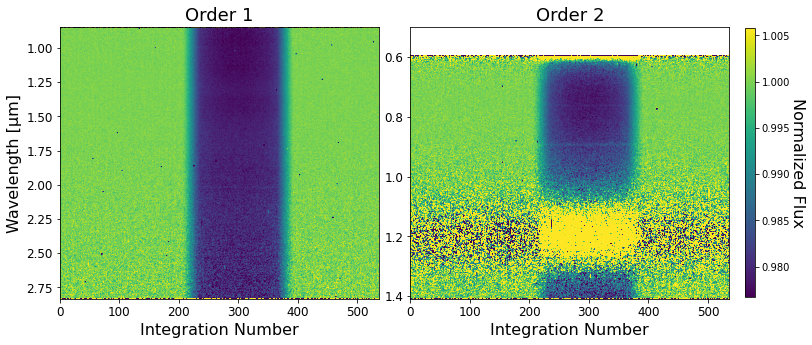

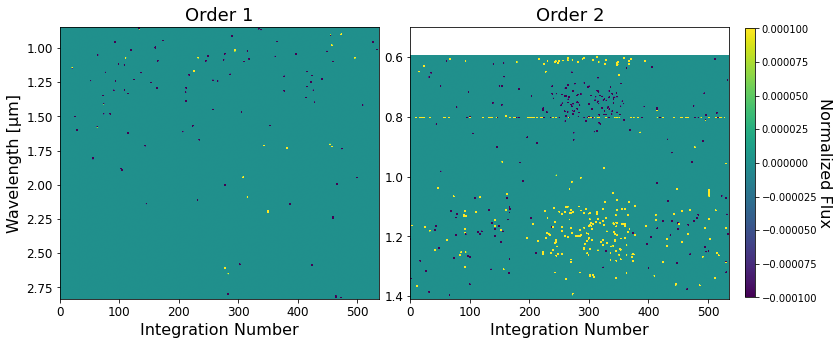

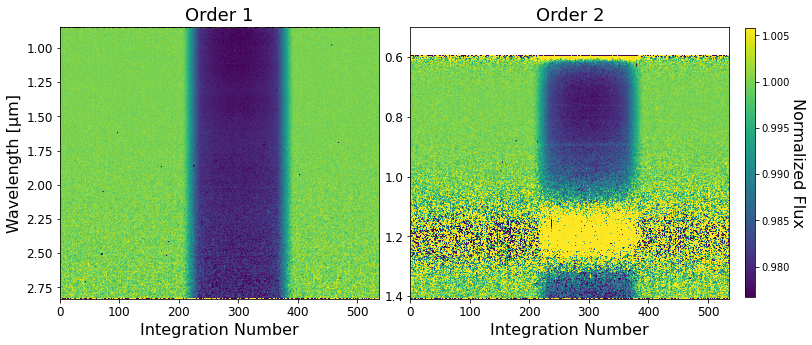

KeyError: 'transform_x'

In [6]:
extract_params={'soss_width': 25, 'transform_x': 0, 'transform_y': 0, 'transform_t': 0}
stellar_spectra = custom_stage3.construct_lightcurves(results, output_dir=outdir_s3, 
                                                      out_frames=[150, -100],
                                                      save_results=False, show_plots=True, 
                                                      extract_params=extract_params)

### Stage 4 -- Lightcurve Fitting

In [4]:
outdir_s4 = 'pipeline_outputs_directory/Stage4/'
outdir_s3 = 'pipeline_outputs_directory/Stage3/'
box = fits.open(outdir_s3 + 'WASP-39_box_spectra_fullres.fits')
atc = fits.open(outdir_s3 + 'WASP-39_atoca_spectra_fullres.fits')
out_trans = np.concatenate([np.arange(150), np.arange(100)-100])
t = box[9].data

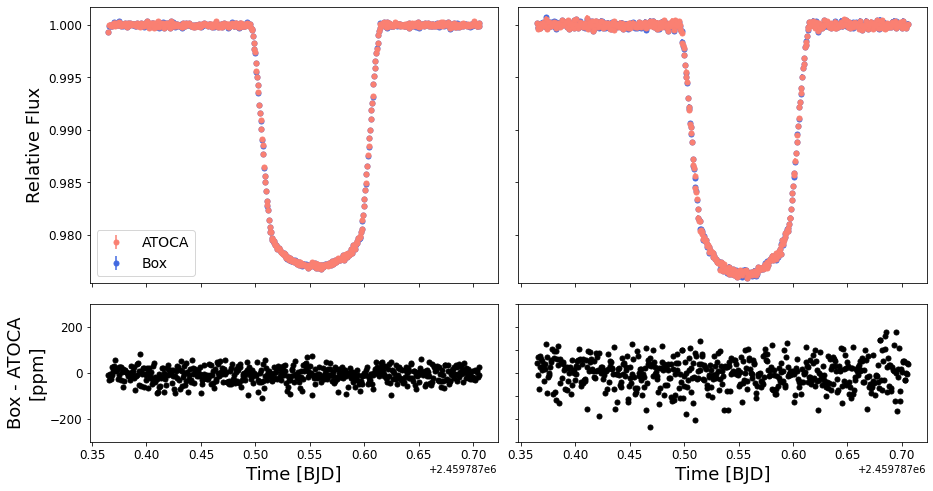

In [5]:
# White light curves for each order
fig = plt.figure(figsize=(15, 8), facecolor='white')
gs = GridSpec(2, 2, height_ratios=[1, 0.5], width_ratios=[1, 1])

ax1 = fig.add_subplot(gs[0, 0])
wlc_o1a = np.nansum(atc[3].data, axis=1)
wlce_o1a = np.sqrt(utils.outlier_resistant_variance(wlc_o1a[out_trans]))
med_out1a = np.nanmedian(wlc_o1a[out_trans])
plt.errorbar(t, wlc_o1a/med_out1a, yerr=wlce_o1a/med_out1a, ls='', marker='o', 
             c='salmon', label='ATOCA', zorder=10)

wlc_o1b = np.nansum(box[3].data, axis=1)
wlce_o1b = np.sqrt(utils.outlier_resistant_variance(wlc_o1b[out_trans]))
med_out1b = np.nanmedian(wlc_o1b[out_trans])
plt.errorbar(t, wlc_o1b/med_out1b, yerr=wlce_o1b/med_out1b, ls='', marker='o', c='royalblue', 
             label='Box')
ax1.xaxis.set_major_formatter(plt.NullFormatter())
plt.legend(fontsize=14)

ax2 = fig.add_subplot(gs[1, 0])
plt.scatter(t, (wlc_o1b/med_out1b - wlc_o1a/med_out1a)*1e6, c='black')
plt.ylim(-300, 300)

ax3 = fig.add_subplot(gs[0, 1])
wlc_o2a = np.nansum(atc[7].data[:, 800:], axis=1)
wlce_o2a = np.sqrt(utils.outlier_resistant_variance(wlc_o2a[out_trans]))
med_out2a = np.nanmedian(wlc_o2a[out_trans])
plt.errorbar(t, wlc_o2a/med_out2a, yerr=wlce_o2a/med_out2a, ls='', marker='o', 
             c='salmon', zorder=10)

wlc_o2b = np.nansum(box[7].data[:, 800:], axis=1)
wlce_o2b = np.sqrt(utils.outlier_resistant_variance(wlc_o2b[out_trans]))
med_out2b = np.nanmedian(wlc_o2b[out_trans])
plt.errorbar(t, wlc_o2b/med_out2b, yerr=wlce_o2b/med_out2b, ls='', marker='o', c='royalblue')
ax3.xaxis.set_major_formatter(plt.NullFormatter())
ax3.yaxis.set_major_formatter(plt.NullFormatter())
ax3.set_ylim(*ax1.get_ylim())

ax4 = fig.add_subplot(gs[1, 1])
plt.scatter(t, (wlc_o2b/med_out2b - wlc_o2a/med_out2a)*1e6, c='black')
ax4.yaxis.set_major_formatter(plt.NullFormatter())
ax4.set_ylim(*ax2.get_ylim())

ax1.set_ylabel('Relative Flux', fontsize=18)
ax2.set_ylabel('Box - ATOCA\n[ppm]', fontsize=18)
ax2.set_xlabel('Time [BJD]', fontsize=18)
ax4.set_xlabel('Time [BJD]', fontsize=18)
ax1.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax4.tick_params(axis='x', labelsize=12)

gs.update(hspace=0.1, wspace=0.05)
plt.show()

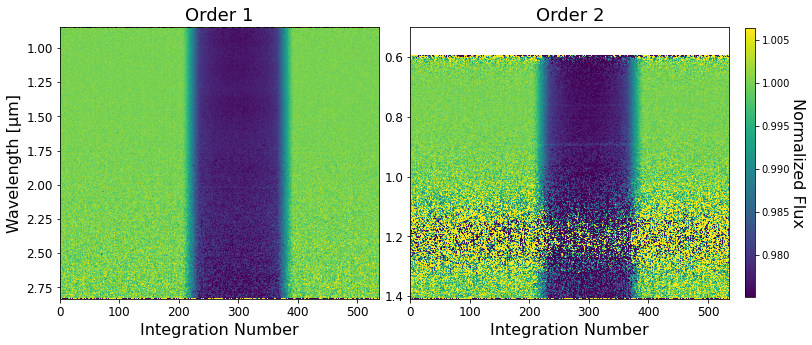

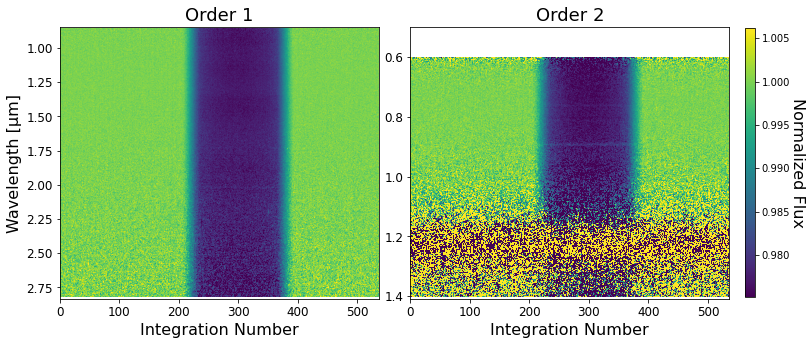

In [6]:
wave1d_o1 = np.nanmean(np.stack([box[1].data[0], box[2].data[0]]), axis=0)
wave1d_o2 = np.nanmean(np.stack([box[5].data[0], box[6].data[0]]), axis=0)
plotting.plot_2dlightcurves(wave1d_o1,
                            box[3].data/np.nanmedian(box[3].data[out_trans], axis=0),
                            wave1d_o2,
                            box[7].data/np.nanmedian(box[7].data[out_trans], axis=0))

plotting.plot_2dlightcurves(wave1d_o1, 
                            atc[3].data/np.nanmedian(atc[3].data[out_trans], axis=0),
                            wave1d_o2,
                            atc[7].data/np.nanmedian(atc[7].data[out_trans], axis=0))

In [8]:
# Using parameters from Mancini+ (2018): https://ui.adsabs.harvard.edu/abs/2018A&A...613A..41M/abstract
priors = {}

params = ['P_p1', 't0_p1', 'p_p1', 'b_p1', 'ecc_p1', 'omega_p1', 'a_p1',
          'q1_SOSS', 'q2_SOSS', 
          'mdilution_SOSS', 'mflux_SOSS', 'sigma_w_SOSS']

dists = ['fixed', 'uniform', 'uniform', 'truncatednormal', 'fixed', 'fixed', 'normal',
         'uniform', 'uniform', 
         'fixed', 'normal', 'loguniform']

hyperps = [4.0552941, [2459787.45, 2459787.65], [1e-2, 0.9], [0.447, 0.1, 0., 1.], 0.0, 90., [11.37, 0.5],
           [0., 1.], [0., 1.], 
           1.0, [0., 0.1], [1e-1, 1e4]]

for param, dist, hyperp in zip(params, dists, hyperps):
    priors[param] = {}
    priors[param]['distribution'], priors[param]['hyperparameters'] = dist, hyperp

for param, dist, hyperp in zip(params, dists, hyperps):
    priors[param] = {}
    priors[param]['distribution'], priors[param]['hyperparameters'] = dist, hyperp

# Order 1
dataset = juliet.load(priors=priors, t_lc={'SOSS': t}, 
                      y_lc={'SOSS': wlc_o1a/med_out1a}, 
                      yerr_lc={'SOSS': 0*wlc_o1a/med_out1a},
                      out_folder=outdir_s4+'atoca_whitelight_order1_nestorprior')

results = dataset.fit(sampler='dynesty')

23601it [07:15, 54.24it/s, +500 | bound: 292 | nc: 1 | ncall: 628087 | eff(%):  3.840 | loglstar:   -inf < 4038.734 <    inf | logz: 3992.149 +/-  0.307 | dlogz:  0.001 >  0.509]


In [12]:
# Order 2
dataset2 = juliet.load(priors=priors, t_lc={'SOSS': t}, 
                       y_lc={'SOSS': wlc_o2a/med_out2a}, 
                       yerr_lc={'SOSS': 0*wlc_o2a/med_out2a},
                       out_folder=outdir_s4+'atoca_whitelight_order2_nestorprior')

results2 = dataset2.fit(sampler='dynesty')

22208it [07:02, 52.54it/s, +500 | bound: 273 | nc: 1 | ncall: 590363 | eff(%):  3.850 | loglstar:   -inf < 3764.790 <    inf | logz: 3720.981 +/-  0.296 | dlogz:  0.001 >  0.509]


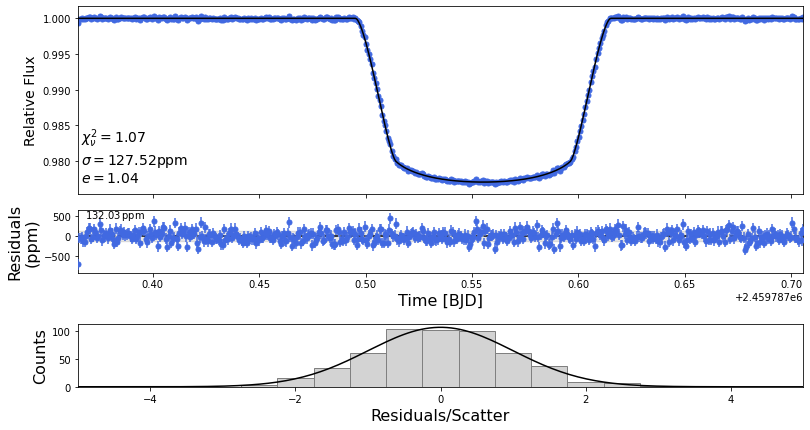

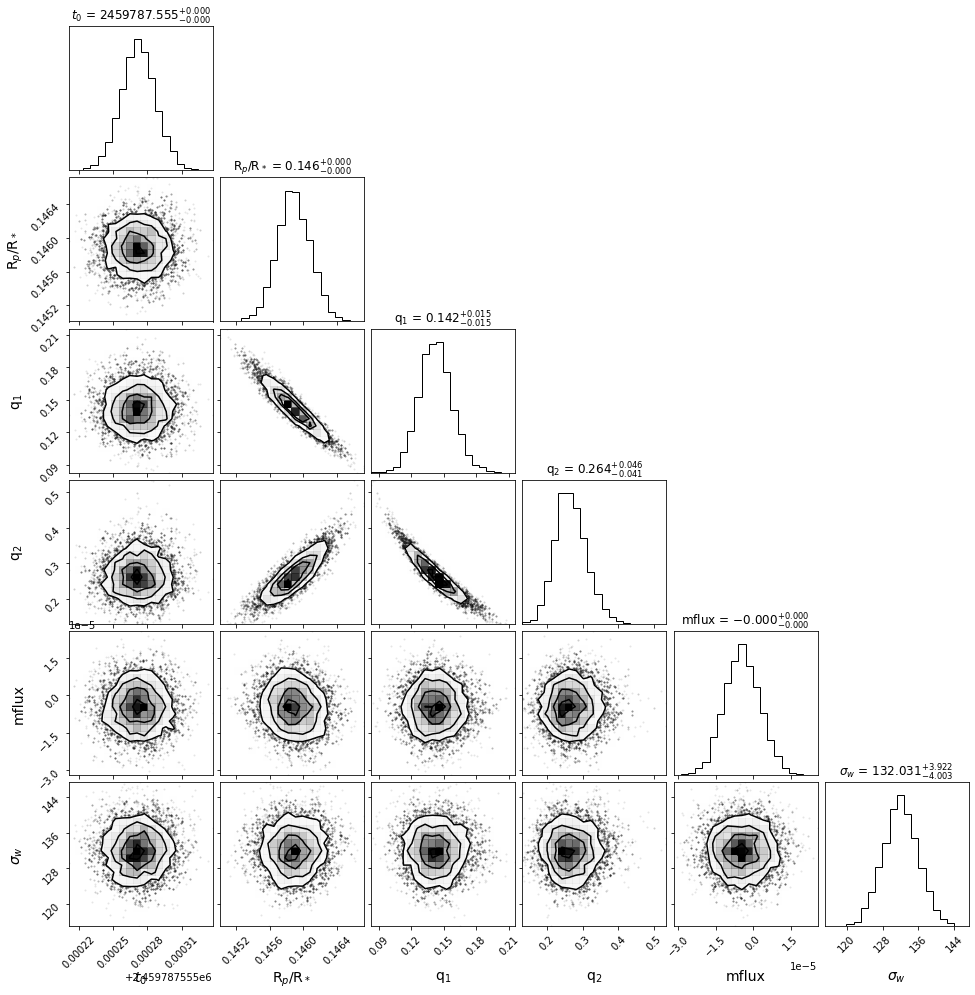

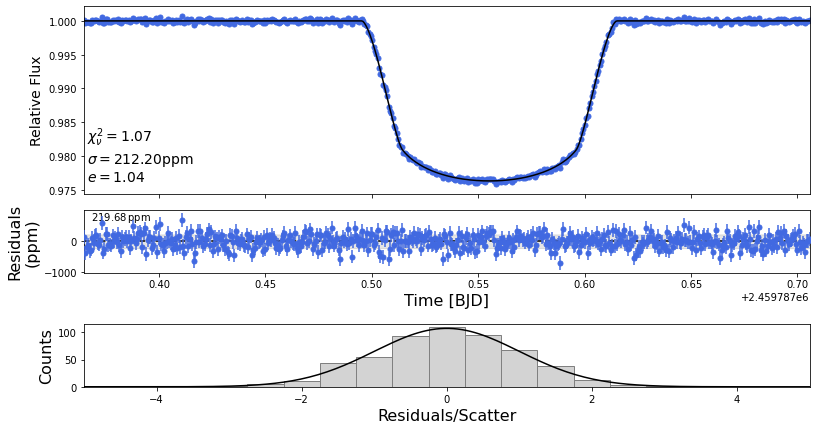

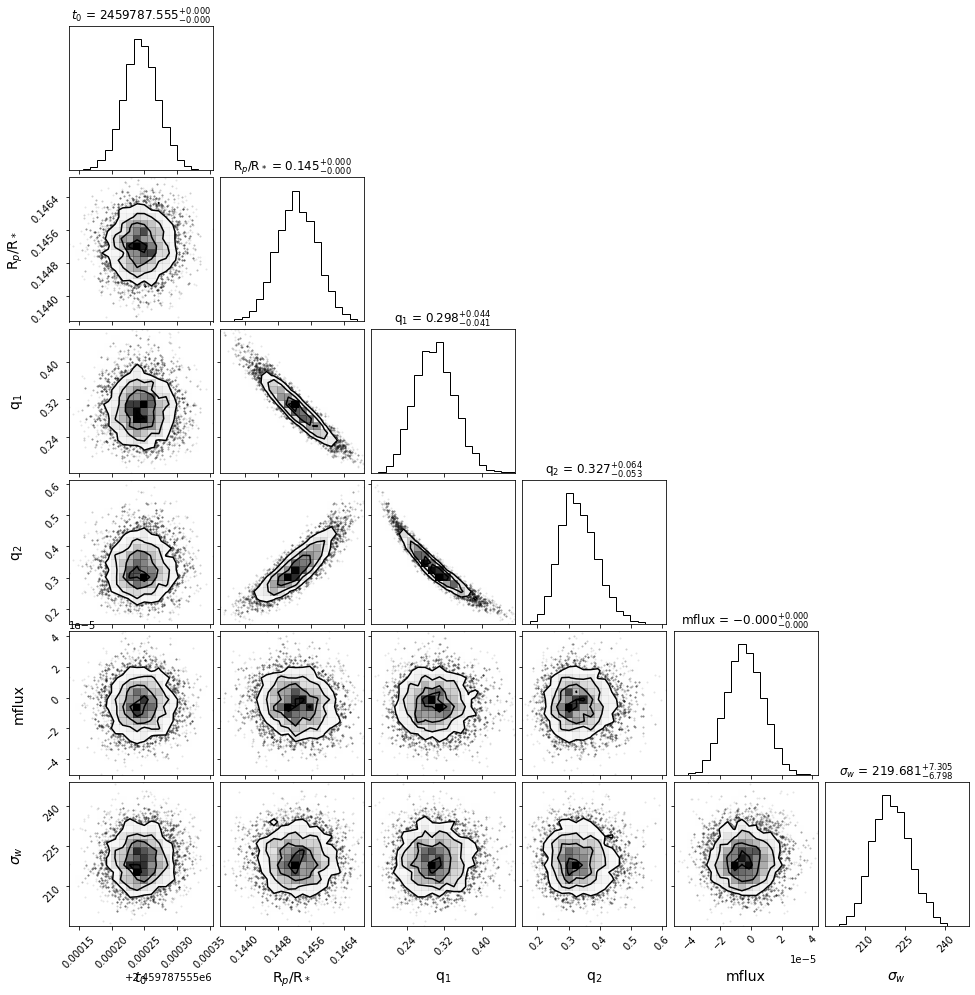

In [13]:
# Order 1
transit_model1 = results.lc.evaluate('SOSS')
scatter = np.median(results.posteriors['posterior_samples']['sigma_w_SOSS'])
out_dev = np.sqrt(utils.outlier_resistant_variance(wlc_o1a[out_trans]/med_out1a))
plotting.do_lightcurve_plot(dataset.times_lc['SOSS'], dataset.data_lc['SOSS'],
                            transit_model1, scatter, out_dev, nfit=6)

fit_params = ['t0_p1', 'p_p1', 'q1_SOSS', 'q2_SOSS', 'mflux_SOSS', 'sigma_w_SOSS']
posterior_names = [r'$t_0$', r'R$_p$/R$_*$', r'q$_1$', r'q$_2$', 'mflux', r'$\sigma_w$']
plotting.make_corner(fit_params, results, posterior_names=posterior_names)

# Order 2
transit_model2 = results2.lc.evaluate('SOSS')
scatter = np.median(results2.posteriors['posterior_samples']['sigma_w_SOSS'])
out_dev = np.sqrt(utils.outlier_resistant_variance(wlc_o2a[out_trans]/med_out2a))
plotting.do_lightcurve_plot(dataset2.times_lc['SOSS'], dataset2.data_lc['SOSS'],
                            transit_model2, scatter, out_dev, nfit=6)

plotting.make_corner(fit_params, results2, posterior_names=posterior_names)

In [68]:
# # Bin to R~150
# wave2d_o1 = np.nanmean(np.stack([box[1].data, box[2].data]), axis=0)
# w1_bin, wl1_bin, wu1_bin, f1_bin, e1_bin = custom_stage4.bin_2d_spectra(wave2d_o1, box[3].data, R=50)
# wl1_bin = w1_bin - wl1_bin
# wu1_bin = w1_bin + wu1_bin
# wave2d_o2 = np.nanmean(np.stack([box[5].data, box[6].data]), axis=0)
# w2_bin, wl2_bin, wu2_bin, f2_bin, e2_bin = custom_stage4.bin_2d_spectra(wave2d_o2, box[7].data, R=50)
# wl2_bin = w2_bin - wl2_bin
# wu2_bin = w2_bin + wu2_bin
# # Write lcs to file
# out = utils.pack_spectra(outdir_s4+'lightcurves_box_R50.fits', wl1_bin, wu1_bin, f1_bin, 
#                          e1_bin, wl2_bin, wu2_bin, f2_bin, e2_bin, t)

# # Bin to R~150
# wave2d_o1 = np.nanmean(np.stack([atc[1].data, atc[2].data]), axis=0)
# w1_bin, wl1_bin, wu1_bin, f1_bin, e1_bin = custom_stage4.bin_2d_spectra(wave2d_o1, atc[3].data, R=150)
# wl1_bin = w1_bin - wl1_bin
# wu1_bin = w1_bin + wu1_bin
# wave2d_o2 = np.nanmean(np.stack([atc[5].data, atc[6].data]), axis=0)
# w2_bin, wl2_bin, wu2_bin, f2_bin, e2_bin = custom_stage4.bin_2d_spectra(wave2d_o2, atc[7].data, R=150)
# wl2_bin = w2_bin - wl2_bin
# wu2_bin = w2_bin + wu2_bin
# # Write lcs to file
# out = utils.pack_spectra(outdir_s4+'lightcurves_atoca_R150.fits', wl1_bin, wu1_bin, f1_bin, 
#                          e1_bin, wl2_bin, wu2_bin, f2_bin, e2_bin, t)

100%|█████████████████████████████████████████| 537/537 [00:24<00:00, 21.55it/s]


In [425]:
# Generate LD estimates 
M_H = 0.01  # Metallicty [dex].
Teff = 5485  # Effective temperature [K].
logg = 4.45  # Gravity [dex].
datafile = outdir_s3 + 'jw01366001001_04101_00001-seg001_nis_extract1dstep_box.fits'
c1_o1, c2_o1 = custom_stage4.gen_ld_coefs(datafile, box[1].data[0], box[2].data[0], order=1, 
                                          M_H=M_H, Teff=Teff, logg=logg)
c1_o2, c2_o2 = custom_stage4.gen_ld_coefs(datafile, box[5].data[0], box[6].data[0], order=2, 
                                          M_H=M_H, Teff=Teff, logg=logg)

2022-08-03 16:35:57,505 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.
2022-08-03 16:36:28,715 - stpipe.Extract1dStep - INFO - Extract1dStep instance created.


In [426]:
utils.package_ld_priors(wave2d_o1[0], c1_o1, c2_o1, order=1, target='WASP-39', M_H=0.01, Teff=5485, 
                  logg=4.45, outdir=outdir_s4)
utils.package_ld_priors(wave2d_o2[0], c1_o2, c2_o2, order=2, target='WASP-39', M_H=0.01, Teff=5485, 
                  logg=4.45, outdir=outdir_s4)

Transmission Spectrum

In [3]:
# BOX
outdir_s4 = 'pipeline_outputs_directory/Stage4/'
outdir_s3 = 'pipeline_outputs_directory/Stage3/'
wave_low = fits.getdata(outdir_s3 + 'WASP-39_box_spectra_fullres.fits', 1)
wave_up = fits.getdata(outdir_s3 + 'WASP-39_box_spectra_fullres.fits', 2)
wave_1b = np.nanmean(np.stack([wave_low, wave_up]), axis=0)
werr_l1b = wave_1b[0] - wave_low[0]
werr_u1b = wave_up[0] - wave_1b[0]
slcb = pd.read_csv(outdir_s4+'speclightcurve_results_order1_box_fullres.csv')
dppm_b1 = slcb['p_p1_m'].values**2*1e6
dppml_b1 = (slcb['p_p1_m'].values**2 - slcb['p_p1_l'].values**2)*1e6
dppmu_b1 = (slcb['p_p1_u'].values**2 - slcb['p_p1_m'].values**2)*1e6

wave_low2 = fits.getdata(outdir_s3 + 'WASP-39_box_spectra_fullres.fits', 5)
wave_up2 = fits.getdata(outdir_s3 + 'WASP-39_box_spectra_fullres.fits', 6)
wave_2b = np.nanmean(np.stack([wave_low2, wave_up2]), axis=0)
werr_l2b = wave_2b[0] - wave_low2[0]
werr_u2b = wave_up2[0] - wave_2b[0]
slc2b = pd.read_csv(outdir_s4 + 'speclightcurve_results_order2_box_fullres.csv')
dppm_b2 = slc2b['p_p1_m'].values**2*1e6
dppml_b2 = (slc2b['p_p1_m'].values**2 - slc2b['p_p1_l'].values**2)*1e6
dppmu_b2 = (slc2b['p_p1_u'].values**2 - slc2b['p_p1_m'].values**2)*1e6

# ATOCA
wave_low = fits.getdata(outdir_s3 + 'WASP-39_atoca_spectra_fullres.fits', 1)
wave_up = fits.getdata(outdir_s3 + 'WASP-39_atoca_spectra_fullres.fits', 2)
wave_1a = np.nanmean(np.stack([wave_low, wave_up]), axis=0)
werr_l1a = wave_1a[0] - wave_low[0]
werr_u1a = wave_up[0] - wave_1a[0]
slca = pd.read_csv(outdir_s4+'speclightcurve_results_order1_atoca_fullres.csv')
dppm_a1 = slca['p_p1_m'].values**2*1e6
dppml_a1 = (slca['p_p1_m'].values**2 - slca['p_p1_l'].values**2)*1e6
dppmu_a1 = (slca['p_p1_u'].values**2 - slca['p_p1_m'].values**2)*1e6

wave_low2 = fits.getdata(outdir_s3 + 'WASP-39_atoca_spectra_fullres.fits', 5)
wave_up2 = fits.getdata(outdir_s3 + 'WASP-39_atoca_spectra_fullres.fits', 6)
wave_2a = np.nanmean(np.stack([wave_low2, wave_up2]), axis=0)
werr_l2a = wave_2a[0] - wave_low2[0]
werr_u2a = wave_up2[0] - wave_2a[0]
slc2a = pd.read_csv(outdir_s4+'speclightcurve_results_order2_atoca_fullres.csv')
dppm_a2 = slc2a['p_p1_m'].values**2*1e6
dppml_a2 = (slc2a['p_p1_m'].values**2 - slc2a['p_p1_l'].values**2)*1e6
dppmu_a2 = (slc2a['p_p1_u'].values**2 - slc2a['p_p1_m'].values**2)*1e6

In [4]:
prism = pd.read_csv('spectrum_lc_fit_wasp39_spec_p008_groupdq_skipjump_SB_superbias_inttimes_higher_Res.csv')

In [5]:
w_o1b, werr_o1b, dppm_o1b, dppmerr_o1b = custom_stage4.bin_at_resolution(wave_1b[0],
                                                                         dppm_b1, R=150)
w_o2b, werr_o2b, dppm_o2b, dppmerr_o2b = custom_stage4.bin_at_resolution(wave_2b[0],
                                                                         dppm_b2, R=150)

w_o1a, werr_o1a, dppm_o1a, dppmerr_o1a = custom_stage4.bin_at_resolution(wave_1a[0],
                                                                         dppm_a1, R=150)
w_o2a, werr_o2a, dppm_o2a, dppmerr_o2a = custom_stage4.bin_at_resolution(wave_2a[0],
                                                                         dppm_a2, R=150)

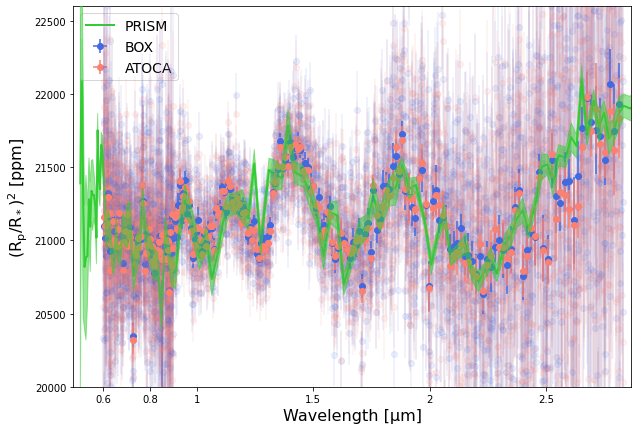

In [6]:
# Plot transmission spectra
plt.figure(figsize=(10, 7), facecolor='white')
plt.errorbar(wave_1b[0], dppm_b1, yerr=[dppml_b1, dppmu_b1], xerr=[werr_l1b, werr_u1b],
             ls='', fmt='o', c='royalblue', ms=6, alpha=0.1)
plt.errorbar(w_o1b, dppm_o1b, yerr=dppmerr_o1b, xerr=werr_o1b,
             ls='', fmt='o', zorder=10, label='BOX', c='royalblue', ms=6)
iib2 = np.where((np.isfinite(dppm_b2)) & (wave_2b[0] < 0.9) & (wave_2b[0] > 0.6))[0]
plt.errorbar(wave_2b[0, iib2], dppm_b2[iib2], yerr=[dppml_b2[iib2], dppmu_b2[iib2]],
             xerr=[werr_l2b[iib2], werr_u2b[iib2]], ls='', fmt='o', 
             zorder=10, c='royalblue', ms=6, alpha=0.1)
ii = np.where((np.isfinite(dppm_o2b)) & (w_o2b < 0.9) & (w_o2b > 0.6))[0]
plt.errorbar(w_o2b[ii], dppm_o2b[ii], yerr=dppmerr_o2b[ii], xerr=werr_o2b[0][ii],
             ls='', fmt='o', zorder=10, c='royalblue', ms=6)

iia1 = np.where((np.isfinite(dppm_a1)))[0]
plt.errorbar(wave_1a[0, iia1], dppm_a1[iia1], yerr=[dppml_a1[iia1], dppmu_a1[iia1]],
             xerr=[werr_l1a[iia1], werr_u1a[iia1]], ls='', fmt='o', c='salmon',
             ms=6, alpha=0.1)
ii = np.where((np.isfinite(dppm_o1a)))[0]
plt.errorbar(w_o1a[ii], dppm_o1a[ii], yerr=dppmerr_o1a[ii], xerr=werr_o1a[0][ii],
             ls='', fmt='o', zorder=10, label='ATOCA', c='salmon', ms=6)
iia2 = np.where((np.isfinite(dppm_a2)) & (wave_2a[0] < 0.9) & (wave_2a[0] > 0.6))[0]
plt.errorbar(wave_2a[0, iia2], dppm_a2[iia2], yerr=[dppml_a2[iia2], dppmu_a2[iia2]],
             xerr=[werr_l2a[iia2], werr_u2a[iia2]], ls='', fmt='o', 
             zorder=10, c='salmon', ms=6, alpha=0.1)
ii = np.where((np.isfinite(dppm_o2a)) & (w_o2a < 0.9) & (w_o2a > 0.6))[0]
plt.errorbar(w_o2a[ii], dppm_o2a[ii], yerr=dppmerr_o2a[ii], xerr=werr_o2a[0][ii],
             ls='', fmt='o', zorder=10, c='salmon', ms=6)


plt.plot(prism['#wave'], prism['depth']*1e6, c='limegreen', lw=2, label='PRISM')
plt.fill_between(prism['#wave'], (prism['depth'] + prism['depth err'])*1e6, 
                 (prism['depth'] - prism['depth err'])*1e6, color='limegreen', alpha=0.5,
                 zorder=15)

plt.xlim(np.min(wave_2b)-0.030, np.max(wave_1b)+0.030)
plt.ylim(20000, 22600)
plt.xlabel('Wavelength [µm]', fontsize=16)
plt.ylabel(r'$\rm (R_p/R_*)^2$ [ppm]', fontsize=16)
plt.xticks([0.6, 0.8, 1, 1.5, 2, 2.5], labels=['0.6', '0.8', '1', '1.5', '2', '2.5'])
plt.legend(fontsize=14, loc=2)
plt.show()

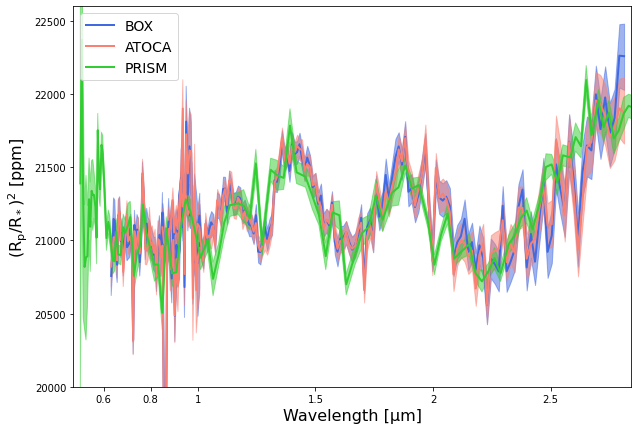

In [5]:
# Plot transmission spectra at R~150
plt.figure(figsize=(10, 7), facecolor='white')
# plt.errorbar(wave_1b[0], dppm_b1, yerr=[dppml_b1, dppmu_b1], xerr=[werr_l1b, werr_u1b],
#              ls='', fmt='o', zorder=10, label='BOX', c='royalblue', ms=6)
# plt.errorbar(wave_2b[0, 30:-45], dppm_b2[30:-45], yerr=[dppml_b2[30:-45], dppmu_b2[30:-45]],
#              xerr=[werr_l2b[30:-45], werr_u2b[30:-45]], ls='', fmt='o', 
#              zorder=10, c='royalblue', ms=6)
plt.plot(wave_1b[0], dppm_b1, c='royalblue', lw=2, label='BOX')
plt.fill_between(wave_1b[0], (dppm_b1 + dppmu_b1), (dppm_b1 - dppml_b1),
                 color='royalblue', alpha=0.5)
plt.plot(wave_2b[0, 30:-45], dppm_b2[30:-45], c='royalblue', lw=2)
plt.fill_between(wave_2b[0, 30:-45], (dppm_b2[30:-45] + dppmu_b2[30:-45]),
                 (dppm_b2[30:-45] - dppml_b2[30:-45]), color='royalblue', alpha=0.5)

# plt.errorbar(wave_1a[0], dppm_a1, yerr=[dppml_a1, dppmu_a1], xerr=[werr_l1a, werr_u1a],
#              ls='', fmt='o', zorder=10, label='ATOCA', c='salmon', ms=6)
# plt.errorbar(wave_2a[0, 30:-45], dppm_a2[30:-45], yerr=[dppml_a2[30:-45], dppmu_a2[30:-45]],
#              xerr=[werr_l2a[30:-45], werr_u2a[30:-45]], ls='',  fmt='o', 
#              zorder=10, c='salmon', ms=6)
plt.plot(wave_1a[0], dppm_a1, c='salmon', lw=2, label='ATOCA')
plt.fill_between(wave_1a[0], (dppm_a1 + dppmu_a1), (dppm_a1 - dppml_a1),
                 color='salmon', alpha=0.5)
plt.plot(wave_2a[0, 30:-45], dppm_a2[30:-45], c='salmon', lw=2)
plt.fill_between(wave_2a[0, 30:-45], (dppm_a2[30:-45] + dppmu_a2[30:-45]),
                 (dppm_a2[30:-45] - dppml_a2[30:-45]), color='salmon', alpha=0.5)

plt.plot(prism['#wave'], prism['depth']*1e6, c='limegreen', lw=2, label='PRISM')
plt.fill_between(prism['#wave'], (prism['depth'] + prism['depth err'])*1e6, 
                 (prism['depth'] - prism['depth err'])*1e6, color='limegreen', alpha=0.5)

plt.xlim(np.min(wave_2b)-0.030, np.max(wave_1b)+0.030)
plt.ylim(20000, 22600)
plt.xlabel('Wavelength [µm]', fontsize=16)
plt.ylabel(r'$\rm (R_p/R_*)^2$ [ppm]', fontsize=16)
plt.xticks([0.6, 0.8, 1, 1.5, 2, 2.5], labels=['0.6', '0.8', '1', '1.5', '2', '2.5'])
plt.legend(fontsize=14, loc=2)
plt.show()

In [6]:
depths = np.concatenate([dppm_b2[iib2], dppm_b1])
errors = np.concatenate([np.nanmean([dppml_b2, dppmu_b2], axis=0)[iib2], 
                         np.nanmean([dppml_b1, dppmu_b1], axis=0)])
waves = np.concatenate([wave_2b[0, iib2], wave_1b[0]])
werrs = np.abs(np.concatenate([np.nanmean([werr_l2b, werr_u2b], axis=0)[iib2],
                               np.nanmean([werr_l1b, werr_u1b], axis=0)]))
orders = np.concatenate([2*np.ones_like(dppm_b2[iib2]), np.ones_like(dppm_b1)]).astype(int)
custom_stage4.save_transmission_spectrum(waves, werrs, depths, errors, orders, outdir_s4, 
                                         filename='WASP-39b_NIRISS_SOSS_box_transmission_spectrum_fullres.csv', 
                                         target='WASP-39b', extraction_type='BOX')

depths = np.concatenate([dppm_a2[iia2], dppm_a1[iia1]])
errors = np.concatenate([np.nanmean([dppml_a2, dppmu_a2], axis=0)[iia2], 
                         np.nanmean([dppml_a1, dppmu_a1], axis=0)[iia1]])
waves = np.concatenate([wave_2a[0, iia2], wave_1a[0, iia1]])
werrs = np.abs(np.concatenate([np.nanmean([werr_l2a, werr_u2a], axis=0)[iia2],
                               np.nanmean([werr_l1a, werr_u1a], axis=0)[iia1]]))
orders = np.concatenate([2*np.ones_like(dppm_a2[iia2]), np.ones_like(dppm_a1[iia1])]).astype(int)
custom_stage4.save_transmission_spectrum(waves, werrs, depths, errors, orders, outdir_s4, 
                                         filename='WASP-39b_NIRISS_SOSS_atoca_transmission_spectrum_fullres.csv', 
                                         target='WASP-39b', extraction_type='ATOCA')

In [11]:
# Check Decontamination
mod = fits.open('pipeline_outputs_directory_v3/Stage3/jw01366001001_04101_00001-seg001_nis_SossExtractModel.fits')
dat = fits.open('pipeline_outputs_directory_v3/Stage2/jw01366001001_04101_00001-seg001_nis_badpixstep.fits')
data = dat[1].data
err = dat[2].data

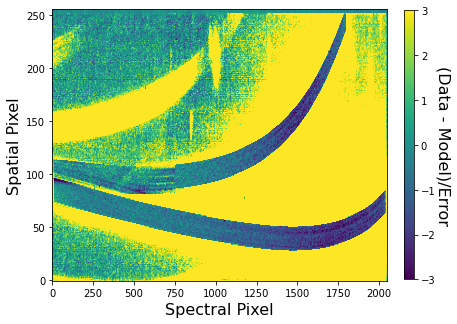

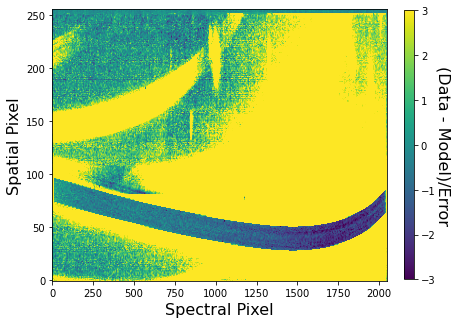

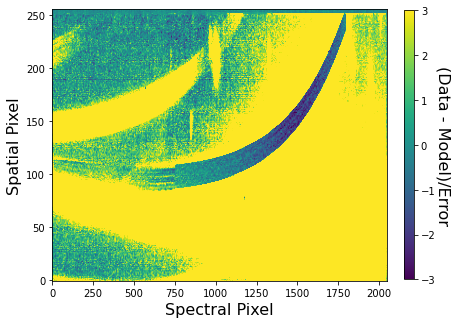

In [12]:
fig, ax = plt.subplots(figsize=(6, 5), facecolor='white')
pp = ax.imshow((data[50] - mod[2].data[50] - mod[3].data[50])/err[50], aspect='auto',
               origin='lower', vmin=-3, vmax=3)
cax = ax.inset_axes([1.05, 0.005, 0.03, 0.99], transform=ax.transAxes)
cb = fig.colorbar(pp, ax=ax, cax=cax)
cb.set_label('(Data - Model)/Error', labelpad=15, rotation=270,
             fontsize=16)

plt.xlabel('Spectral Pixel', fontsize=16)
plt.ylabel('Spatial Pixel', fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(6, 5), facecolor='white')
pp = ax.imshow((data[50] - mod[2].data[50])/err[50], aspect='auto',
               origin='lower', vmin=-3, vmax=3)
cax = ax.inset_axes([1.05, 0.005, 0.03, 0.99], transform=ax.transAxes)
cb = fig.colorbar(pp, ax=ax, cax=cax)
cb.set_label('(Data - Model)/Error', labelpad=15, rotation=270,
             fontsize=16)

plt.xlabel('Spectral Pixel', fontsize=16)
plt.ylabel('Spatial Pixel', fontsize=16)
plt.show()

fig, ax = plt.subplots(figsize=(6, 5), facecolor='white')
pp = ax.imshow((data[50] - mod[3].data[50])/err[50], aspect='auto',
               origin='lower', vmin=-3, vmax=3)
cax = ax.inset_axes([1.05, 0.005, 0.03, 0.99], transform=ax.transAxes)
cb = fig.colorbar(pp, ax=ax, cax=cax)
cb.set_label('(Data - Model)/Error', labelpad=15, rotation=270,
             fontsize=16)

plt.xlabel('Spectral Pixel', fontsize=16)
plt.ylabel('Spatial Pixel', fontsize=16)
plt.show()

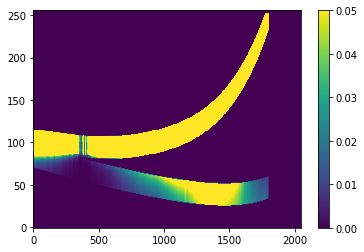

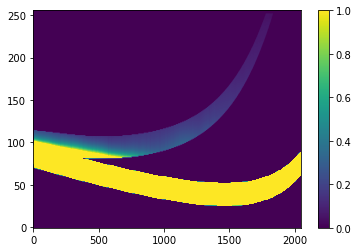

In [13]:
plt.imshow((mod[3].data[50]), aspect='auto', origin='lower', vmin=0, vmax=0.05)
plt.colorbar()
plt.show()

plt.imshow((mod[2].data[50]), aspect='auto', origin='lower', vmin=0, vmax=1)
plt.colorbar()
plt.show()